In [1]:
import os
import sys
import numpy as np
import laspy as lp
from shapely.geometry import Polygon

sys.path.append(os.path.abspath(os.path.join('../scripts')))
from fetch_data import FetchAndLoad

In [3]:
MINX, MINY, MAXX, MAXY = [-93.759055, 41.925015, -93.766155, 41.935015]
polygon = Polygon(((MINX, MINY), (MINX, MAXY), (MAXX, MAXY), (MAXX, MINY), (MINX, MINY)))
lp = FetchAndLoad(polygon)
lp.run_pipe()


Run pipe ...
data LInk :  https://s3-us-west-2.amazonaws.com/usgs-lidar-public/IA_FullState/ept.json
Fetching Completed!


In [4]:
lp.create_geopandasdf()
new_result =  lp.get_geopandas_df()

Reading Las File from : IA_FullState.las
Generating Points from las File ...
Finished Generating Points!
Making Geopandas Data Frame...
Finished Making Geopandas Data Frame!


In [12]:
new_result

,elevation,geometry
0,318.52,POINT (-93.77000 41.93000)
1,318.46,POINT (-93.77000 41.93000)
2,318.26,POINT (-93.77000 41.93000)
3,318.53,POINT (-93.77000 41.93000)
4,318.68,POINT (-93.77000 41.93000)
...,...,...
911712,310.41,POINT (-93.77000 41.94000)
911713,310.54,POINT (-93.77000 41.94000)
911714,311.15,POINT (-93.77000 41.93000)
911715,310.90,POINT (-93.77000 41.94000)


In [13]:
point_cloud=lp.read_laz()

Reading Las File from : IA_FullState.las


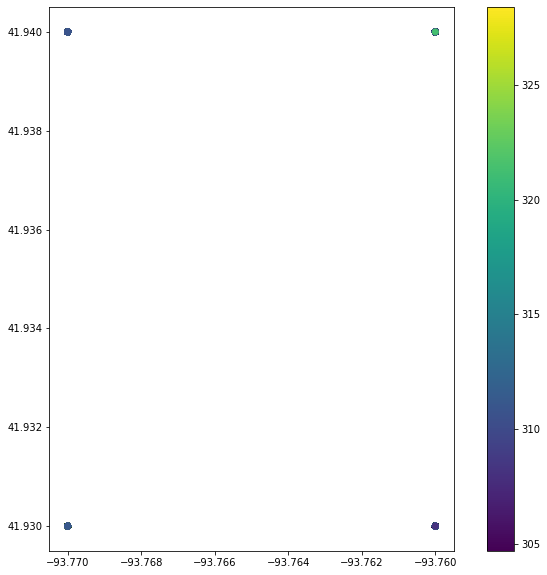

In [15]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 1, figsize=(12, 10))

new_result.plot(column='elevation', ax=ax, legend=True)
plt.show()

AttributeError: 'File' object has no attribute 'geometry'

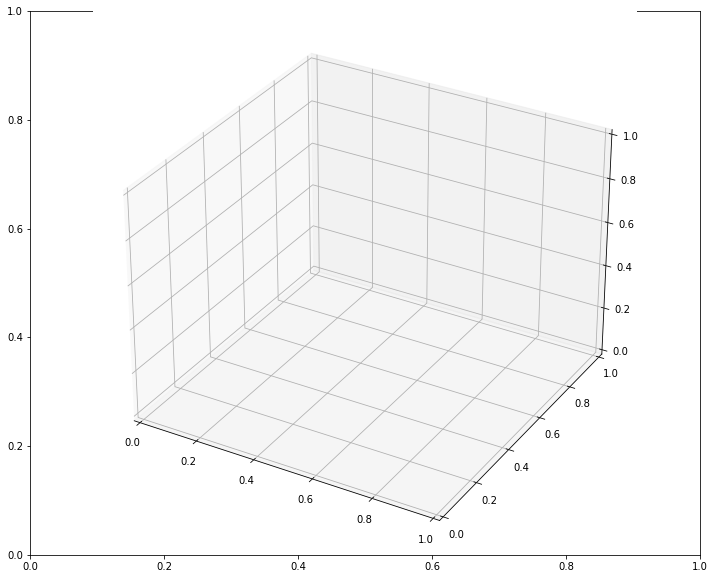

In [14]:
lp.plot_terrain_3d(point_cloud,size =0.002)

In [17]:
points = np.vstack((point_cloud.x, point_cloud.y, point_cloud.z)).transpose()
colors = np.vstack((point_cloud.red, point_cloud.green, point_cloud.blue)).transpose()


In [19]:
factor=160
decimated_points_random = points[::factor]

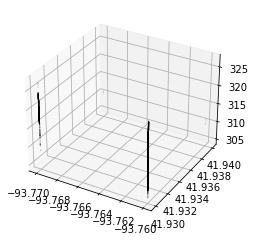

In [21]:
import matplotlib.pyplot as plt
decimated_colors = colors[::factor]
ax = plt.axes(projection='3d')
ax.scatter(decimated_points_random[:,0], decimated_points_random[:,1], decimated_points_random[:,2], c = decimated_colors/65535, s=0.01)
plt.show()